In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep
mplhep.style.use(mplhep.style.ATLAS)

In [2]:
class v_distribution:

    def __ini__(self):
        pass

    def __sample(self) -> int:
        """
        Sample a point from the distribution.
        """
        k = 2
        sum = np.sum(np.random.uniform(low=0, high=1, size=2))
        while sum < 1:
            k += 1
            sum += np.random.uniform(low=0, high=1, size=1)
        return k

    def sample(self, n: int) -> np.ndarray:
        """
        Sample n points from the distribution.
        """
        samples = np.empty(n)
        for i in range(n):
            samples[i] = self.__sample()
        return samples

In [3]:
n_samples = np.logspace(1, 8, num=10, dtype=int)
averages = np.empty(n_samples.shape)
for i, n in enumerate(n_samples):
    print(f'{i} - Computing average for n = {n}')
    averages[i] = np.mean(v_distribution().sample(n))

0 - Computing average for n = 10
1 - Computing average for n = 59
2 - Computing average for n = 359
3 - Computing average for n = 2154
4 - Computing average for n = 12915
5 - Computing average for n = 77426
6 - Computing average for n = 464158
7 - Computing average for n = 2782559
8 - Computing average for n = 16681005
9 - Computing average for n = 100000000


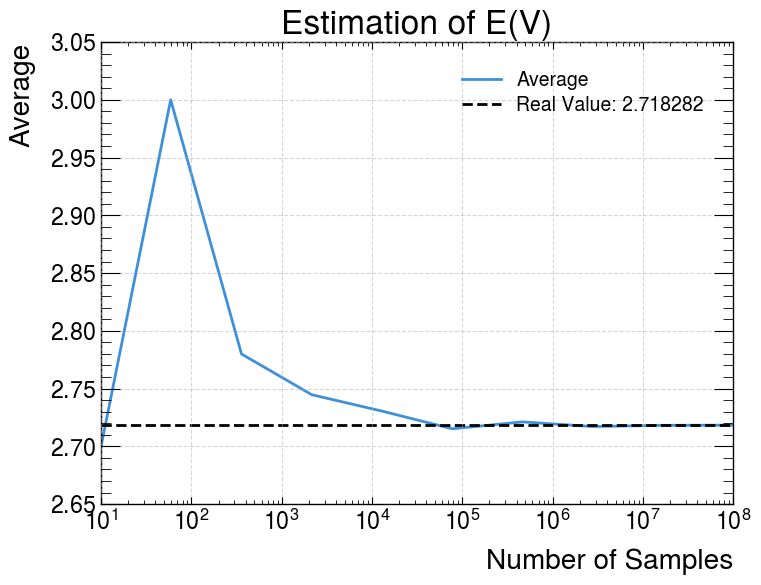

In [4]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5)
ax.plot(n_samples, averages, label='Average')
ax.axhline(np.e, label=f'Real Value: {np.e:.6f}', color='black', linestyle='--',)
ax.set_xlabel('Number of Samples')
ax.set_title('Estimation of E(V)')
# ax.set_ylabel('Integral Estimate')
ax.set_ylabel('Average')
ax.legend()
ax.set_xscale('log')